In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('./data/bank-marketing/bank-additional-full.csv', sep = ';')
#Converting dependent variable categorical to dummy
labels = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# bank.columns

In [4]:
bank = bank.drop(['y'],axis=1)

In [5]:
data_client = bank.iloc[: , 0:7]
data_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_client['job']      = labelencoder_X.fit_transform(data_client['job']) 
data_client['marital']  = labelencoder_X.fit_transform(data_client['marital']) 
data_client['education']= labelencoder_X.fit_transform(data_client['education']) 
data_client['default']  = labelencoder_X.fit_transform(data_client['default']) 
data_client['housing']  = labelencoder_X.fit_transform(data_client['housing']) 
data_client['loan']     = labelencoder_X.fit_transform(data_client['loan']) 

In [7]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data_client);

In [8]:
data_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


# Related with the last contact of the current campaign



In [10]:
# Slicing DataFrame to treat separately, make things more easy
data_bank_related = bank.iloc[: , 7:11]
data_bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


# Contact, Month, Day of Week treatment

In [11]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_bank_related['contact']     = labelencoder_X.fit_transform(data_bank_related['contact']) 
data_bank_related['month']       = labelencoder_X.fit_transform(data_bank_related['month']) 
data_bank_related['day_of_week'] = labelencoder_X.fit_transform(data_bank_related['day_of_week']) 

In [12]:
data_bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [13]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(data_bank_related);

In [14]:
data_bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


# Social and economic context attributes

In [15]:
data_bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
data_bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# Other attributes

In [16]:
data_bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
data_bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [17]:
data_bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [18]:
data_bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

# Model

In [19]:
data_bank_final= pd.concat([data_client, data_bank_related, data_bank_se, data_bank_o], axis = 1)
data_bank_final = data_bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
data_bank_final.shape

(41188, 20)

In [20]:
from sklearn.metrics import classification_report
def reports(truelab,predlabels):
    print(confusion_matrix(truelab, predlabels))
    print("Accuracy ",round(accuracy_score(truelab, predlabels),2)*100)
    
    print (classification_report(y_pred=predlabels,y_true=truelab))
    return ( round(accuracy_score(truelab, predlabels),2)*100)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_bank_final, labels, test_size = 0.3, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [22]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
7271,2,9,1,2,1,0,2,1,6,2,2,1.1,93.994,-36.4,4.860,5191.0,4,999,0,1
13284,1,3,2,3,0,0,0,0,3,4,5,1.4,93.918,-42.7,4.962,5228.1,1,999,0,1
11580,3,1,1,2,1,0,0,1,4,0,1,1.4,94.465,-41.8,4.959,5228.1,10,999,0,1
31835,2,6,1,5,0,2,0,0,6,2,2,-1.8,92.893,-46.2,1.327,5099.1,2,999,0,1
19551,3,4,1,6,0,2,0,0,1,2,1,1.4,93.444,-36.1,4.968,5228.1,1,999,0,1


In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

LOGCV = reports(y_test,logpred)

[[10708   270]
 [  884   495]]
Accuracy  91.0
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10978
           1       0.65      0.36      0.46      1379

    accuracy                           0.91     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357



# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
KNNCV = reports(y_test,knnpred)

[[10793   185]
 [ 1023   356]]
Accuracy  90.0
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10978
           1       0.66      0.26      0.37      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

RFCCV = reports(y_test,rfcpred)

[[10543   435]
 [  721   658]]
Accuracy  91.0
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10978
           1       0.60      0.48      0.53      1379

    accuracy                           0.91     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



# GNB

In [27]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

GAUSIAN = reports(y_test,gaussiannbpred)

[[9688 1290]
 [ 616  763]]
Accuracy  85.0
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10978
           1       0.37      0.55      0.44      1379

    accuracy                           0.85     12357
   macro avg       0.66      0.72      0.68     12357
weighted avg       0.88      0.85      0.86     12357



In [28]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier','K-Near Neighbors', 'Logistic Model', 'Gausian NB'],
                'Score':  [RFCCV,  KNNCV, LOGCV, GAUSIAN]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,91.0
2,Logistic Model,91.0
1,K-Near Neighbors,90.0
3,Gausian NB,85.0


In [30]:
from sklearn import metrics

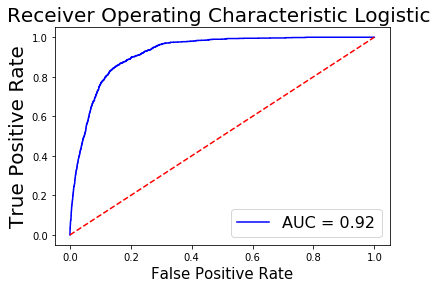

In [31]:
#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

plt.plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Logistic ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

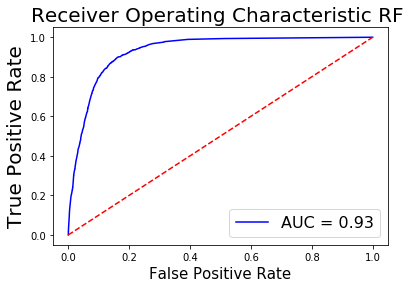

In [32]:
#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic RF ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

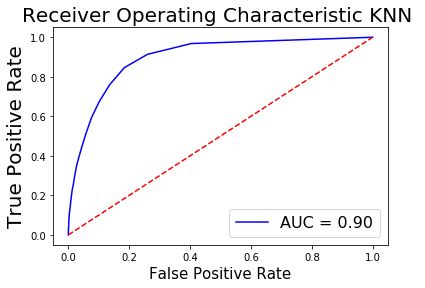

In [33]:
#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

plt.plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic KNN ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

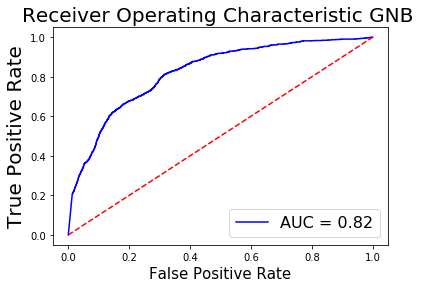

In [34]:
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

plt.plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic GNB ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

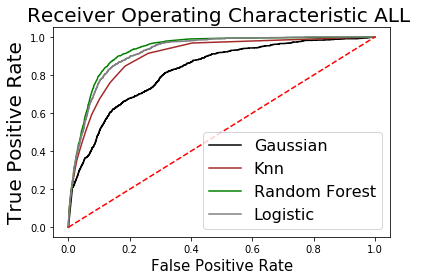

In [35]:
#ALL PLOTS ----------------------------------
plt.plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
plt.plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
plt.plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
plt.plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic ALL ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# Data Balancing

In [37]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# rus = RandomUnderSampler(random_state=42)
# X_resampled_u, y_resampled_u = rus.fit_resample(X_train, y_train)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

LOGCV = reports(y_test,logpred)

[[9344 1634]
 [ 195 1184]]
Accuracy  85.0
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10978
           1       0.42      0.86      0.56      1379

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.74     12357
weighted avg       0.92      0.85      0.87     12357



# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
KNNCV = reports(y_test,knnpred)

[[9018 1960]
 [ 279 1100]]
Accuracy  82.0
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     10978
           1       0.36      0.80      0.50      1379

    accuracy                           0.82     12357
   macro avg       0.66      0.81      0.69     12357
weighted avg       0.90      0.82      0.85     12357



# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

RFCCV = reports(y_test,rfcpred)

[[10336   642]
 [  563   816]]
Accuracy  90.0
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10978
           1       0.56      0.59      0.58      1379

    accuracy                           0.90     12357
   macro avg       0.75      0.77      0.76     12357
weighted avg       0.90      0.90      0.90     12357



# GNB

In [41]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

GAUSIAN = reports(y_test,gaussiannbpred)

[[9028 1950]
 [ 475  904]]
Accuracy  80.0
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     10978
           1       0.32      0.66      0.43      1379

    accuracy                           0.80     12357
   macro avg       0.63      0.74      0.65     12357
weighted avg       0.88      0.80      0.83     12357



In [42]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier','K-Near Neighbors', 'Logistic Model', 'Gausian NB'],
                'Score':  [RFCCV,  KNNCV, LOGCV, GAUSIAN]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,90.0
2,Logistic Model,85.0
1,K-Near Neighbors,82.0
3,Gausian NB,80.0


In [43]:
from sklearn import metrics

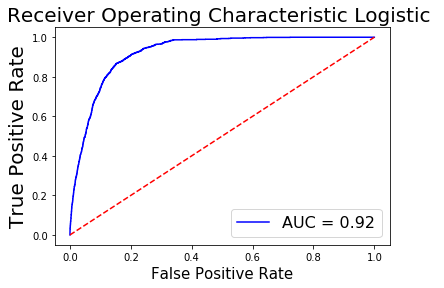

In [44]:
#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

plt.plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Logistic ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

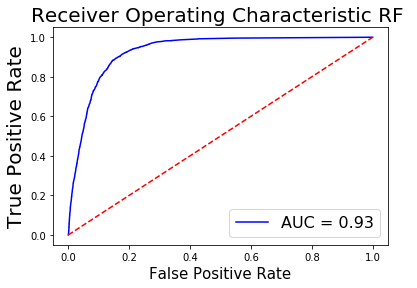

In [45]:
#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

plt.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic RF ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

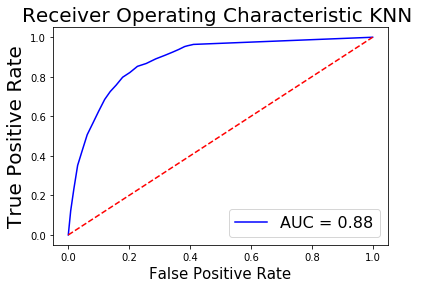

In [46]:
#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

plt.plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic KNN ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

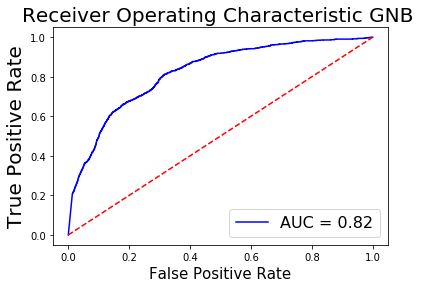

In [47]:
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

plt.plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic GNB ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

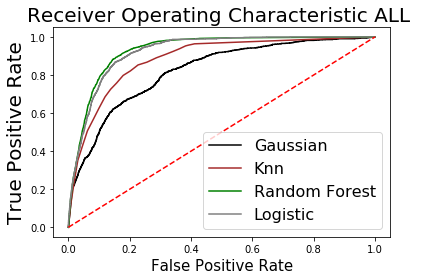

In [48]:
#ALL PLOTS ----------------------------------
plt.plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
plt.plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
plt.plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
plt.plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic ALL ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 